# Exploratory Data Analysis Al-Quran Indonesia

In [1]:
# Import Library

import re
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt # pip install matplotlib
import plotly.express as px # pip install plotly
import unicodedata as ud
from wordcloud import WordCloud # pip install wordcloud

import cufflinks as cf # pip install cufflinks
import missingno as msno # pip install missingno

from sklearn.feature_extraction.text import CountVectorizer # pip install scikit-learn

import warnings
import platform,os,socket,re,uuid,json,psutil,logging # pip install psutil
warnings.filterwarnings('ignore')

In [2]:
# Config Setting Visualize

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use('ggplot')
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]

In [3]:
# Hardware Spesification

print("Hardware spesification :---")
def getSystemInfo():
    try:
        info={}
        info['platform']=platform.system()
        info['platform-release']=platform.release()
        info['platform-version']=platform.version()
        info['architecture']=platform.machine()
        info['hostname']=socket.gethostname()
        info['ip-address']=socket.gethostbyname(socket.gethostname())
        info['mac-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
        info['CPU count']=os.cpu_count()
        info['processor']=platform.processor()
        info['python version']=platform.python_version()
        info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

Hardware spesification :---


{'platform': 'Linux',
 'platform-release': '4.19.0-20-amd64',
 'platform-version': '#1 SMP Debian 4.19.235-1 (2022-03-17)',
 'architecture': 'x86_64',
 'hostname': 'mx-rocks',
 'ip-address': '127.0.0.1',
 'mac-address': '8c:16:45:1d:36:f5',
 'CPU count': 2,
 'processor': '',
 'python version': '3.9.7',
 'ram': '4 GB'}

In [4]:
# Load Dataset

path = '../dataset/quran_indonesian.csv'
#path = '../dataset/quran_arabic.csv'
data = pd.read_csv(path, index_col=0)

print("Dataframe looks like : ")
data.head(20)

Dataframe looks like : 


,Surah,Ayah,Text
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam."
2,1,3,Maha Pemurah lagi Maha Penyayang.
3,1,4,Yang menguasai di Hari Pembalasan.
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke..."
5,1,6,Tunjukilah kami jalan yang lurus
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...
7,2,1,Alif laam miim.
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6236 entries, 0 to 6235
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Surah   6236 non-null   int64 
 1   Ayah    6236 non-null   int64 
 2   Text    6236 non-null   object
dtypes: int64(2), object(1)
memory usage: 194.9+ KB


In [6]:
# Data Statistics

data.describe()

,Surah,Ayah
count,6236.000000,6236.000000
mean,33.519724,53.506575
std,26.461261,50.463924
min,1.000000,1.000000
25%,11.000000,16.000000
50%,26.000000,38.000000
75%,51.000000,75.000000
max,114.000000,286.000000


In [7]:
# Columns and Raw

print("Shape of data =>",data.shape)

Shape of data => (6236, 3)


In [8]:
# Get Columns

print("Columns of data =>",data.columns)

Columns of data => Index(['Surah', 'Ayah', 'Text'], dtype='object')


In [9]:
print("Null value :")
data.isnull().sum()

Null value :


Surah    0
Ayah     0
Text     0
dtype: int64

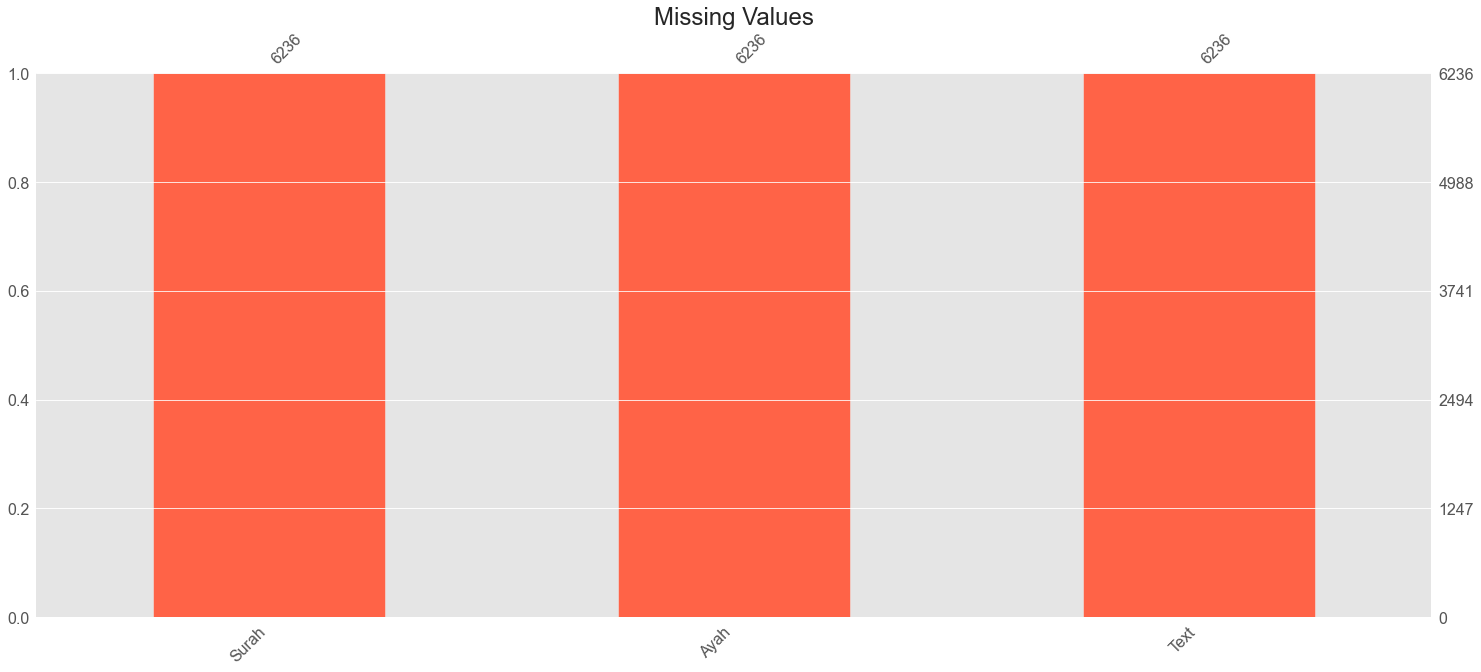

In [10]:
# Visualisasi Missing Values

msno.bar(data, color=(orange_black[2]))
plt.title('Missing Values', fontsize=24)
plt.show()

In [11]:
for index, text in enumerate(data['Text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Dialah Allah, yang menjadikan segala yang ada di bumi untuk kamu dan Dia berkehendak (menciptakan) langit, lalu dijadikan-Nya tujuh langit. Dan Dia Maha Mengetahui segala sesuatu.
Review 2:
 Ingatlah ketika Tuhanmu berfirman kepada para Malaikat: "Sesungguhnya Aku hendak menjadikan seorang khalifah di muka bumi". Mereka berkata: "Mengapa Engkau hendak menjadikan (khalifah) di bumi itu orang yang akan membuat kerusakan padanya dan menumpahkan darah, padahal kami senantiasa bertasbih dengan memuji Engkau dan mensucikan Engkau?" Tuhan berfirman: "Sesungguhnya Aku mengetahui apa yang tidak kamu ketahui".
Review 3:
 Dan Dia mengajarkan kepada Adam nama-nama (benda-benda) seluruhnya, kemudian mengemukakannya kepada para Malaikat lalu berfirman: "Sebutkanlah kepada-Ku nama benda-benda itu jika kamu mamang benar orang-orang yang benar!"
Review 4:
 Mereka menjawab: "Maha Suci Engkau, tidak ada yang kami ketahui selain dari apa yang telah Engkau ajarkan kepada kami; sesungguhnya Engka

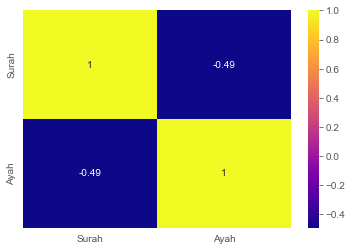

In [12]:
# Visualisasi Data Correlation

colormap = plt.cm.plasma

f, ax = plt.subplots(figsize=(6, 4))
corrMatrix = data.corr()
ax = sns.heatmap(corrMatrix, cmap=colormap, annot=True)
plt.show()

In [13]:
# Character Length

data['Char_Length'] = data['Text'].apply(lambda x: len(str(x)))

data.head(30)

,Surah,Ayah,Text,Char_Length
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,65
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",43
2,1,3,Maha Pemurah lagi Maha Penyayang.,33
3,1,4,Yang menguasai di Hari Pembalasan.,34
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",86
5,1,6,Tunjukilah kami jalan yang lurus,32
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,147
7,2,1,Alif laam miim.,15
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,83
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...",141


In [18]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data['Char_Length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Char_Length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [19]:
data.describe()

,Surah,Ayah,Char_Length
count,6236.000000,6236.000000,6236.000000
mean,33.519724,53.506575,178.980276
std,26.461261,50.463924,130.261882
min,1.000000,1.000000,8.000000
25%,11.000000,16.000000,85.000000
50%,26.000000,38.000000,149.000000
75%,51.000000,75.000000,235.000000
max,114.000000,286.000000,1697.000000


In [20]:
data[data.Char_Length == 1697].Text.iloc[0]

'Hai orang-orang yang beriman, apabila kamu bermuÂ´amalah tidak secara tunai untuk waktu yang ditentukan, hendaklah kamu menuliskannya. Dan hendaklah seorang penulis di antara kamu menuliskannya dengan benar. Dan janganlah penulis enggan menuliskannya sebagaimana Allah mengajarkannya, meka hendaklah ia menulis, dan hendaklah orang yang berhutang itu mengimlakkan (apa yang akan ditulis itu), dan hendaklah ia bertakwa kepada Allah Tuhannya, dan janganlah ia mengurangi sedikitpun daripada hutangnya. Jika yang berhutang itu orang yang lemah akalnya atau lemah (keadaannya) atau dia sendiri tidak mampu mengimlakkan, maka hendaklah walinya mengimlakkan dengan jujur. Dan persaksikanlah dengan dua orang saksi dari orang-orang lelaki (di antaramu). Jika tak ada dua oang lelaki, maka (boleh) seorang lelaki dan dua orang perempuan dari saksi-saksi yang kamu ridhai, supaya jika seorang lupa maka yang seorang mengingatkannya. Janganlah saksi-saksi itu enggan (memberi keterangan) apabila mereka dipan

In [21]:
data[data.Char_Length == 8].Text.iloc[0]

'Thaahaa.'

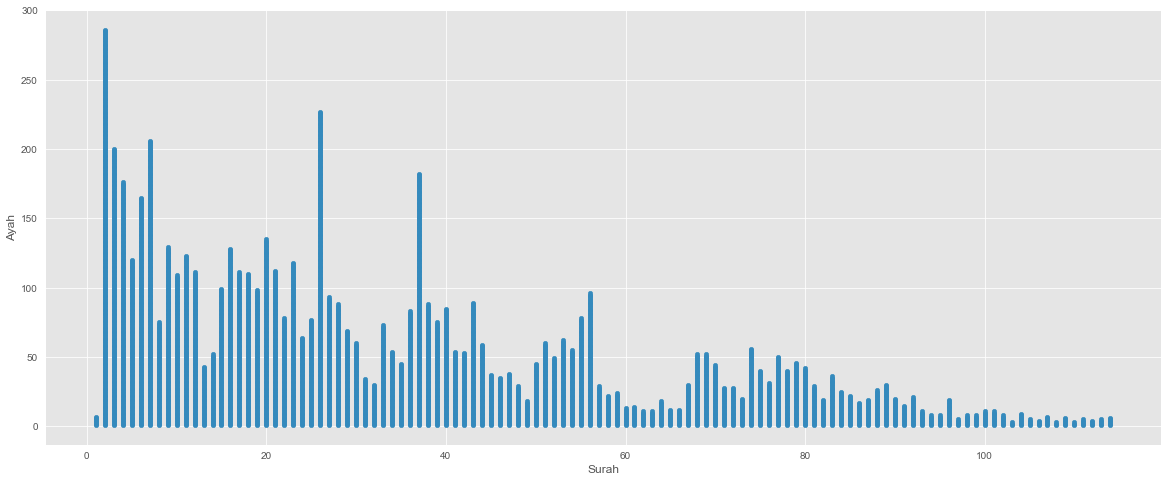

In [22]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
data.plot.scatter('Surah', 'Ayah', ax=ax);

In [23]:
D = {b'\\xf0\\x9f\\x98\\xad': 1,
     b'\\xf0\\x9f\\x98\\x82': 1,
     b'\\xF0\\x9F\\x98\\xA2': 2,
     b'\\xF0\\x9F\\x98\\x98': 1,
     b'\\xF0\\x9F\\x98\\x86': 2,
     b'\\xF0\\x9F\\x98\\x89': 1,
     b'\\xF0\\x9F\\x8D\\xB0': 4,
     b'\\xF0\\x9F\\x8D\\xAB': 2,
     b'\\xE2\\x98\\x95': 1}

for k,v in D.items():
    k = k.decode('unicode-escape').encode('latin1').decode('utf8')
    try:
        n = ud.name(k)
    except ValueError:
        n = 'no such name'
    print(k,ascii(k),n)

😭 '\U0001f62d' LOUDLY CRYING FACE
😂 '\U0001f602' FACE WITH TEARS OF JOY
😢 '\U0001f622' CRYING FACE
😘 '\U0001f618' FACE THROWING A KISS
😆 '\U0001f606' SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES
😉 '\U0001f609' WINKING FACE
🍰 '\U0001f370' SHORTCAKE
🍫 '\U0001f36b' CHOCOLATE BAR
☕ '\u2615' HOT BEVERAGE


In [24]:
data.head(15)

,Surah,Ayah,Text,Char_Length
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,65
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",43
2,1,3,Maha Pemurah lagi Maha Penyayang.,33
3,1,4,Yang menguasai di Hari Pembalasan.,34
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",86
5,1,6,Tunjukilah kami jalan yang lurus,32
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,147
7,2,1,Alif laam miim.,15
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,83
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...",141


In [25]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_word = get_top_n_words(data['Text'], 20)
common_words = get_top_n_bigram(data['Text'], 20)

In [26]:
# The distribution of top trigrams before removing stop words

df2 = pd.DataFrame(common_words,
                   columns = ['Text' , 'count'])

df2.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 20 trigrams in review before removing stop words')

In [27]:
# The distribution of top unigrams before removing stop words

df1 = pd.DataFrame(common_word, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

In [28]:
data.to_csv('../dataset/data_preparation.csv')